# Working with Image Dataset

In this notebook, we'll demonstrate how to load, explore, visualize, preprocess, and create DataLoaders for the CelebA dataset using the `datasets` library.

In [2]:
# Step 1: Install Required Libraries
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


### Step 2: Load the Dataset

https://huggingface.co/datasets/eurecom-ds/celeba-hq-small

In [ ]:
import os
os.environ['HF_TOKEN'] ="your_hugging_face_token_here"


In [3]:
from datasets import load_dataset

# Load the CelebA dataset
dataset = load_dataset('eurecom-ds/celeba-hq-small')

# Print the dataset structure
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/246 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/150 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/371 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'attributes'],
        num_rows: 246
    })
    val: Dataset({
        features: ['image', 'attributes'],
        num_rows: 150
    })
    test: Dataset({
        features: ['image', 'attributes'],
        num_rows: 371
    })
})


### Step 3: Explore the Dataset

In [31]:
# Access the training split
train_dataset = dataset['train']

# Print the first example in the training dataset
train_dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 'attributes': [0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1]}

### Step 4: Visualize Some Images

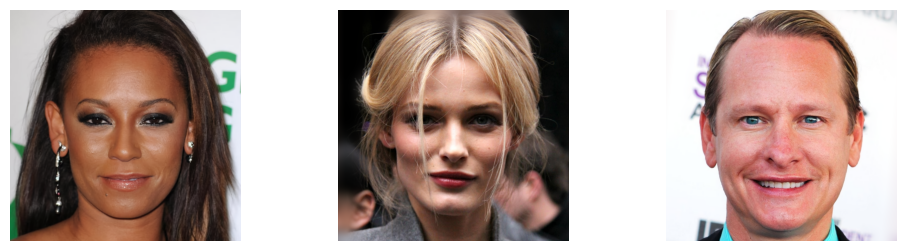

In [68]:
import matplotlib.pyplot as plt


def show_images_tensor(dataset, num_images=3):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        image = dataset[i]['image']
        image = np.array(image)
        image = np.transpose(image, (1, 2, 0))  # Transpose dimensions
        image = image[:, :, ::-1]  # Convert color channels from RGB to BGR

        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


def show_images(dataset, num_images=3):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        image = dataset[i]['image']
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Show some images from the training dataset
show_images(train_dataset)

### Step 5: Preprocess the Images

In [69]:
from torchvision import transforms
import torch

# Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(50),  # Randomly rotate the image
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change the
    transforms.ToTensor(),  # Convert the image to a tensor

])

# Apply the transformation to the dataset
def preprocess(batch):
    batch['image'] = [transform(image) for image in batch['image']]
    return batch



# with_transfrom

In [70]:
train_dataset1 = train_dataset.with_transform(preprocess)
train_dataset1

Dataset({
    features: ['image', 'attributes'],
    num_rows: 246
})

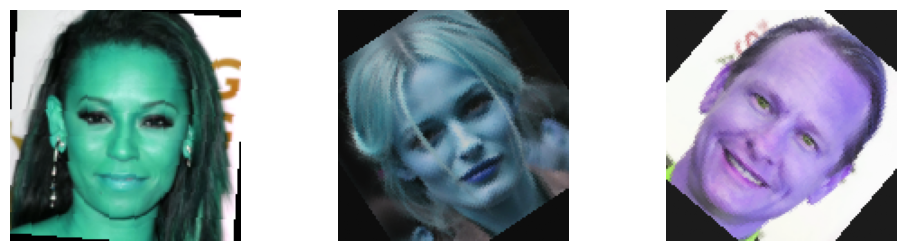

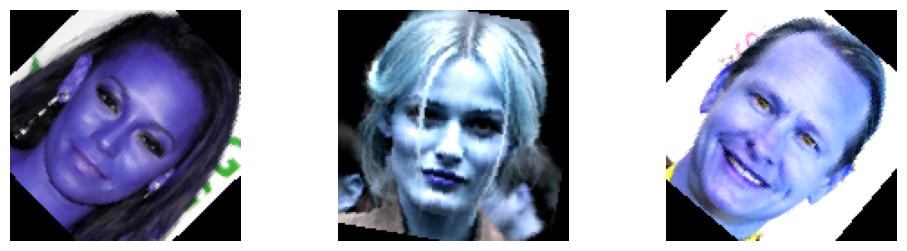

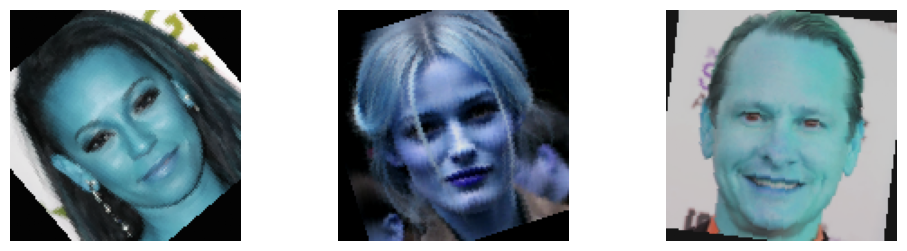

In [71]:

# Show some images from the training dataset
for i in range(3) :
  show_images_tensor(train_dataset1)

# with_map

In [54]:
train_dataset2 = train_dataset.map(preprocess,batched=True,batch_size=4)
train_dataset2

Map:   0%|          | 0/246 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'attributes'],
    num_rows: 246
})

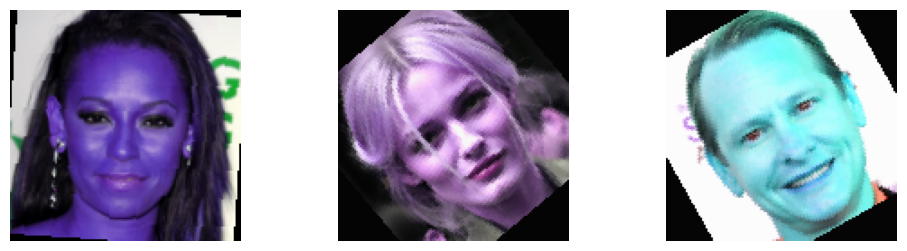

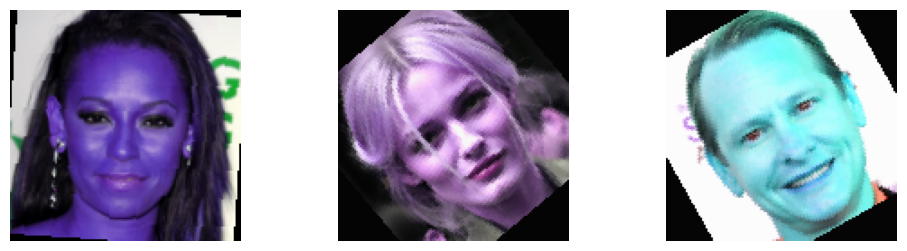

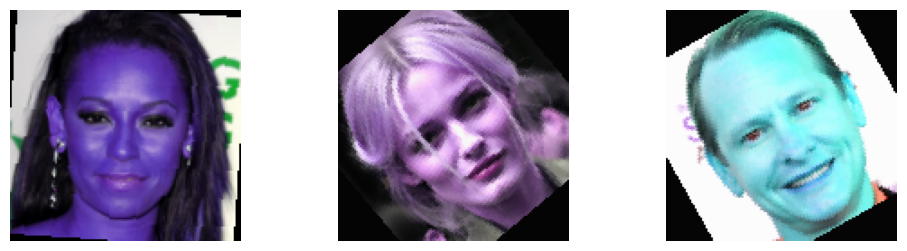

In [72]:

# Show some images from the training dataset
for i in range(3) :
  show_images_tensor(train_dataset2)

### Step 6: Create DataLoaders

In [73]:
from torch.utils.data import DataLoader

# Create DataLoaders
train_loader = DataLoader(train_dataset1, batch_size=32, shuffle=True)

# Iterate through the DataLoader
for batch in train_loader:
    images = batch['image']
    images = np.array(images)

    labels = batch['attributes']
    labels  = np.array(labels )

    print(images.shape, labels.shape)
    break

(32, 3, 128, 128) (40, 32)
